In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv"
df = pd.read_csv(url)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
np.shape(df)

(21613, 21)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [3]:
# Dropping off some unnecessary columns

df = df.drop(['id', 'date'], axis=1)

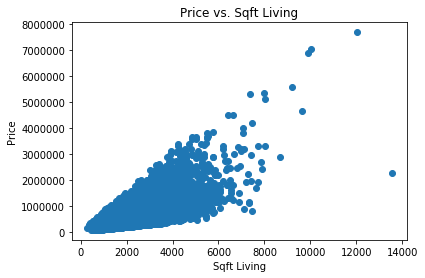

In [22]:
# Plot a scatter plot of price vs. sqft_living
plt.scatter(df['sqft_living'], df['price'])
plt.title('Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

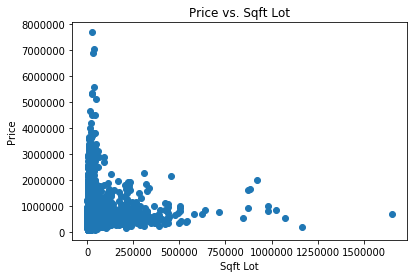

In [23]:
# Plot a scatter plot of price vs. sqft_living
plt.scatter(df['sqft_lot'], df['price'])
plt.title('Price vs. Sqft Lot')
plt.xlabel('Sqft Lot')
plt.ylabel('Price')
plt.show()

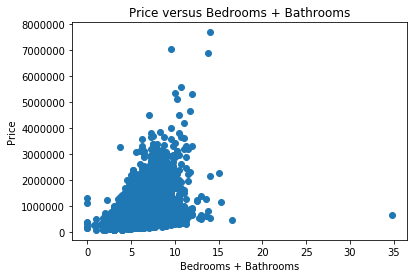

In [7]:
# Create a scatter plot of price versus the combination of bedrooms and bathrooms
plt.scatter(df['bedrooms'] + df['bathrooms'], df['price'])
plt.xlabel('Bedrooms + Bathrooms')
plt.ylabel('Price')
plt.title('Price versus Bedrooms + Bathrooms')
plt.show()

In [4]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [5]:
# Identify columns with low correlation with 'price' or high correlation with other variables
low_corr_cols = []
high_corr_cols = []
for col in corr_matrix.columns:
    if corr_matrix['price'][col] < 0.3:
        low_corr_cols.append(col)
    elif corr_matrix['price'][col] > 0.7 and col != 'price':
        high_corr_cols.append(col)

# Drop the columns with low or high correlation
df = df.drop(low_corr_cols + high_corr_cols, axis=1)

# Display the resulting DataFrame
print(df.head())

    price  bedrooms  bathrooms  view  grade  sqft_above  sqft_basement  \
0  221900         3       1.00     0      7        1180              0   
1  538000         3       2.25     0      7        2170            400   
2  180000         2       1.00     0      6         770              0   
3  604000         4       3.00     0      7        1050            910   
4  510000         3       2.00     0      8        1680              0   

       lat  sqft_living15  
0  47.5112           1340  
1  47.7210           1690  
2  47.7379           2720  
3  47.5208           1360  
4  47.6168           1800  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7849B1C48>,
      dtype=object)

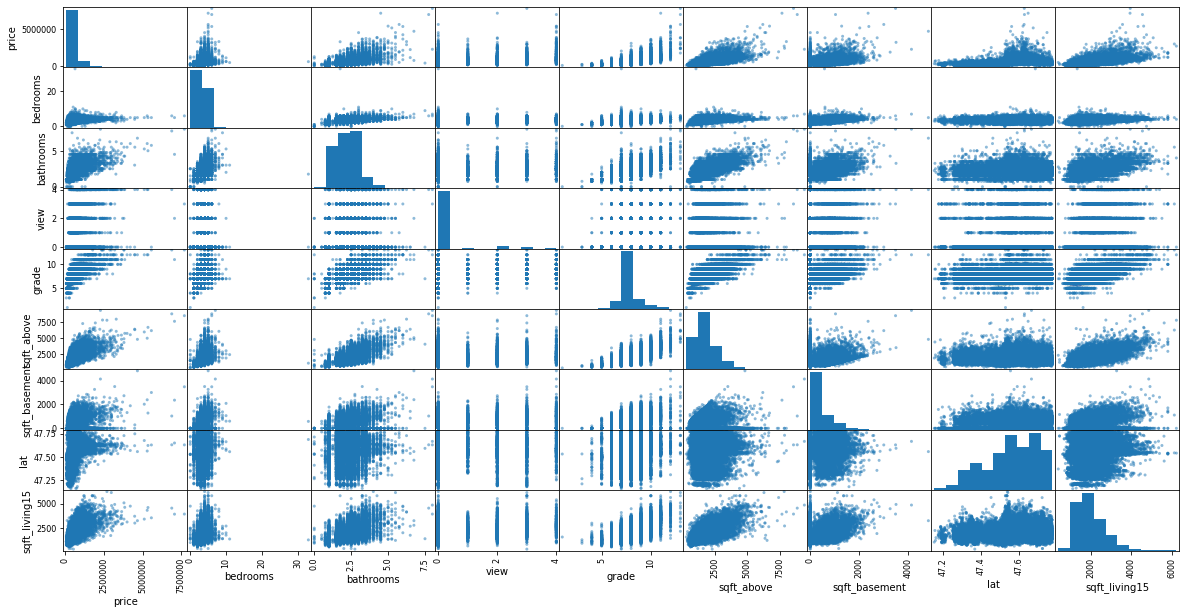

In [6]:
# Visualizing the results above

from pandas.plotting import scatter_matrix # which plots every numerical attribute against every other numerical attribute

attributes=df.columns
scatter_matrix(df[attributes],figsize=(20,10))